In [1]:
NAME = "Enjui Chang"
OPTION = "Designing a plagiarism detector"

# PART 1: Rolling Hashing


In the rolling hashing problem, d is defined as the number of characters in the input alphabet. The value I chose for q is a 10-digit prime number, this is necessary as large hash tables are needed when we are trying to find the patterns in real text and as k increases. Specifically, this q can hold a 30-digit string without having a collision due to overflow, which would decreases the accuracy of the algorithm (it returned different answers compared to regular hashing when q was smaller).

Hash tables are the better data structure for this problem as the naive approach requires two for-loops, with one iterating through strings in x and the other in y while doing rolling hashing. In this case, the time complexity will be $O(n\times m)$ with $n$ as the length of one string and $m$ as the length of another. However, once we use the data structure of a hash table, the time complexity of the algorithm will reduce to $O(n)$ as the cost for lookup in a hash table is $O(m)$ (iterating through the second stirng), meaning that the time complexity is $min(O(n),O(m))$.


I chose to use python dictionaries as the hash table, therefore, whenever inputting new items in the hash table, the hash table will automatically trigger resizing if needed. In addition, python dictionaries uses open addressing to solve collisions in the table, which is better than chained list asymtoptically.

I created a rolling hashing function, which outputs a hash table with all the substrings recorded inside.

In [2]:
# rolling hashing

# d is the number of characters in the alphabet (case-insenstive)
d = 128

# q is a 10 digit prime number
q = 1500450271

def rolling_hashing(x, k, hash_val, htable):
    """
    Uses rolling hashing to find the corresponding hash table
    
    Input:
    - x: string of interest
    - k: int, length of substring
    - hash_val: inital hash value
    - htable: an empty hash table
    
    Output:
    - hash table of all the length-k substrings in x
    """
    for index in range(len(x)-k+1):
        if index:

            # remove the last char
            hash_val = (hash_val - ord(x[index-1])*(d**(k-1)%q))%q
            
            # append the new char
            hash_val = (hash_val * d + ord(x[index+k-1]))%q
        
        # append the values into the hash table
        htable[hash_val] = index
        
    return htable

def rh_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    
    Output:
    - A list of tuples (i, j) where x[i:i+k] = y[j:j+k]
    """
    
    # avoid case problem
    x = x.lower()
    y = y.lower() 
    
    # remove unwanted characters and remove the spaces
    x = x.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    y = y.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    
    # find the length of each string
    len_x = len(x)
    len_y = len(y)   
    
    # raise error if input strings contains no letters
    if len_x == 0 or len_y == 0:
        raise ValueError("Input needs to have at least one letter")
        
    # check if the input string is larger than k and readjust the k
    while len_x < k or len_y < k:
        k -= 1
    
    # intialize stroage
    storage = []
    
    # create a hash table using dictionaries and initial hash value
    htable = {}
    hash_val = 0
    
    # find the inital hash value for x
    for i in range(k):
        hash_val = (hash_val*d + ord(x[i]))%q

    # rolling hashing for every substring in x 
    rolling_hashing(x, k, hash_val, htable)
    
    
    # find the inital hash value for y
    hash_val = 0
    
    # initialize the first
    for i in range(k):
        hash_val = (hash_val*d + ord(y[i]))%q
    
    # rolling hashing for every substring in y  
    for index in range(len_y-k+1):
        if index:
            
            # remove the last char
            hash_val = (hash_val - ord(y[index-1])*(d**(k-1)%q))%q
            
            # append the new char
            hash_val = (hash_val * d + ord(y[index+k-1]))%q
        
        # if lookup suceeds then store the value
        if hash_val in htable.keys():
            storage.append((htable[hash_val],index))
            
    return storage

In [3]:
# test cases
# lowercase/uppercase
assert(rh_get_match("aera er re Eria", "q rkae ke wEria", 4) ==  [(8, 8)])

#  unwanted charcters
assert(rh_get_match("When she walks, she's like a samba/That swings so cool and sways so gently/That when she passes Each one she passes goes, ah","When she walks, she's like a samba", 25) == [(0, 0), (1, 1), (2, 2)])

# when k is larger the actual string, return the largerst possible k
assert(rh_get_match("When she walks, she's like a samba/That swings so cool and sways so gently/That when she passes Each one she passes goes, ah","When she walks, she's like a samba", 50) == [(0, 0)])

# real text example
x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."
assert(rh_get_match(x, y, 25) == [(0, 0), (42, 39)]) 

# raise error when one string doesn't have any letters
rh_get_match(".", "q rkae ke wEria", 4)


ValueError: Input needs to have at least one letter

# PART 2: Regular Hashing

In the regular hashing approach, I used **djb2 hash function** created by Dan Bernstein. This hash function is deterministic and quite uniform. It uses a **multiplication** method to determine the hash value and perform fairly well at reducing collisions [Boyd (2012)](https://softwareengineering.stackexchange.com/questions/49550/which-hashing-algorithm-is-best-for-uniqueness-and-speed/145633#145633). 

In the following section, I test the asymtpotic growth of 5 different types of hash function including summation, xor bitwise operation, summation with consideration of order, random bits from seed, and djb2. I also found the number of collision observed if we were to use a linked list for each bucket.

In [61]:
import random

# four different hash functions + djb2

# summation
def hash1(s):
    ans = 0
    for char in s:
        ans += ord(char)
    return ans 

# xor bitwise operation
def hash2(s):
    ans = 0
    for char in s:
        ans = ans ^ ord(char)
    return ans

# summation with consideration of order
def hash3(s):
    ans = 0
    for char in s:
        ans = ans*128 + ord(char)
    return ans 

# random bits from seed
def hash4(s):
    random.seed(ord(s[0]))
    return random.getrandbits(32)

# djb2 hash function
def hash_djb2(s):
    hash = 5381
    for c in s:
        hash = (hash * 33) + ord(c)
    return hash

In [84]:
import string

# generate random word
def randomword(length):
    return ''.join(random.choice(string.ascii_lowercase) for i in range(length))

# create empty hash table
def empty_hash_table(N):
    return [[] for n in range(N)]

# add new item to the hash table
def add_to_hash_table(hash_table, item, hash_function):
    N = len(hash_table)
    hash_table[hash_function(item)%N].append(item)
    
    return hash_table

# lookup hash table
def contains(hash_table, item, hash_function):
    N = len(hash_table)
    
    # return true if the item has already been stored in the hash_table
    for i in hash_table[hash_function(item)%N]:
        if i == item:
            return True
    return False

# create 100,000 words of 10 characters each
words = []
for i in range(100000):
    words.append(randomword(10))
    
# create empty hash tables
table1 = empty_hash_table(5000)
table2 = empty_hash_table(5000)
table3 = empty_hash_table(5000)
table4 = empty_hash_table(5000)
table5 = empty_hash_table(5000)

# add the words into the hash table
for i in words:
    add_to_hash_table(table1,i,hash1)
    add_to_hash_table(table2,i,hash2)
    add_to_hash_table(table3,i,hash3)
    add_to_hash_table(table4,i,hash4)
    add_to_hash_table(table5,i,hash_djb2)

In [94]:
# initialze variables
import matplotlib.pyplot as plt
import time
iteration = 50
factor = 20

# initialize storage
test1 = []
test2 = []
test3 = []
test4 = []
test_djb2 = []

# main for loop for runtime tracking
for k in range(1,factor+1):
    
    # create 100,000 words of 10 characters each
    words = []
    for i in range(5000*k):
        words.append(randomword(10))

    # create empty hash tables
    table1 = empty_hash_table(5000)
    table2 = empty_hash_table(5000)
    table3 = empty_hash_table(5000)
    table4 = empty_hash_table(5000)
    table5 = empty_hash_table(5000)

    # add the words into the hash table
    for i in words:
        add_to_hash_table(table1,i,hash1)
        add_to_hash_table(table2,i,hash2)
        add_to_hash_table(table3,i,hash3)
        add_to_hash_table(table4,i,hash4)
        add_to_hash_table(table5,i,hash_djb2)

    temp_test1 = 0
    temp_test2 = 0
    temp_test3 = 0
    temp_test4 = 0
    temp_test_djb2 = 0
    
    # interations for each n (size of string)
    for i in words:
        # hash table 1
        start = time.time() 
        contains(table1, i, hash1) # call the search function
        end = time.time()
        temp_test1 += (end-start) # append the time to storage

        # hash table 2
        start = time.time() 
        contains(table2, i, hash2) # call the search function
        end = time.time()
        temp_test2 += (end-start) # append the time to storage

        # hash table 3
        start = time.time() 
        contains(table3, i, hash3) # call the search function
        end = time.time()
        temp_test3 += (end-start) # append the time to the list

        # hash table 4
        start = time.time() 
        contains(table4, i, hash4) # call the search function
        end = time.time()
        temp_test4 += (end-start) # append the time to storage

        # hash function djb2
        start = time.time() 
        contains(table5, i, hash_djb2) # call the search function
        end = time.time()
        temp_test_djb2 += (end-start) # append the time to storage

    test1.append(temp_test1/iteration)
    test2.append(temp_test2/iteration)
    test3.append(temp_test3/iteration)
    test4.append(temp_test4/iteration)
    test_djb2.append(temp_test_djb2/iteration)
    

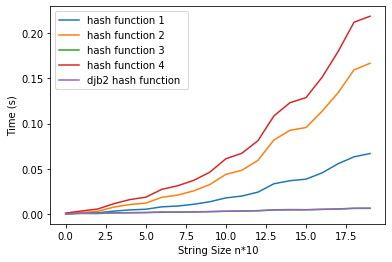

In [97]:
# plotting
plt.plot(range(factor),test1, label = "hash function 1")
plt.plot(range(factor),test2, label = "hash function 2")
plt.plot(range(factor),test3, label = "hash function 3")
plt.plot(range(factor),test4, label = "hash function 4")
plt.plot(range(factor),test_djb2, label = "djb2 hash function ")

plt.xlabel("String Size n*10")
plt.ylabel("Time (s)")
plt.legend()

In [76]:
# initialize storage
num_col_1 = 0
num_col_2 = 0
num_col_3 = 0
num_col_4 = 0
num_col_5 = 0

# run through each hash table and 
# append the total number of collision (length-1) in each bucket 
# if it is not empty

for i in range(len(table1)):
    if len(table1[i])>1:
        num_col_1+= len(table1[i])-1
        
for i in range(len(table2)):
    if len(table2[i])>1:
        num_col_2+= len(table2[i])-1
        
for i in range(len(table3)):
    if len(table3[i])>1:
        num_col_3+= len(table3[i])-1
        
for i in range(len(table4)):
    if len(table4[i])>1:
        num_col_4+= len(table4[i])-1
        
for i in range(len(table5)):
    if len(table5[i])>1:
        num_col_5+= len(table5[i])-1

# print the result
print("Number of collision for hash function 1:",num_col_1)
print("Number of collision for hash function 2:",num_col_2)
print("Number of collision for hash function 3:",num_col_3)
print("Number of collision for hash function 4:",num_col_4)
print("Number of collision for hash function 5:",num_col_5)

Number of collision for hash function 1: 99823
Number of collision for hash function 2: 99968
Number of collision for hash function 3: 95000
Number of collision for hash function 4: 99974
Number of collision for hash function 5: 95000


Both the figure and number of collision suggest hash function 3 and djb2 hash function have the best time complexity and the smallest number of collisions, justifying the use of it in regular hashing.

In [ ]:
# regular hashing

# djb2 hash function
def hash_djb2(s):
    """
    Calculates the hash value of a string using djb2 hash function
    Input:
    - s: strings
    Output:
    - hash value of each string
    """
    hash = 5381
    for c in s:
        hash = (hash * 33) + ord(c)
    return hash

def regular_get_match(x, y, k):
    """
    Finds all common length-k substrings of x and y
    NOT using rolling hashing on both strings.
    
    Input:
    - x, y: strings
    - k: int, length of substring
    
    Output:
    - A list of tuples (i, j)
    """
    # avoid case problem
    x = x.lower()
    y = y.lower() 
    
    # remove unwanted characters and concatenate 
    x = x.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    y = y.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    
    # find the length of each string
    len_x = len(x)
    len_y = len(y)   
    
    # raise error if input strings contains no letters
    if len_x == 0 or len_y == 0:
        raise ValueError("Input needs to have at least one letter")
        
    # check if the input string is larger than k and readjust the k
    while len_x < k or len_y < k:
        k -= 1
    
    # intialize stroage
    storage = []
    
    # create a hash table using dictionaries
    htable = {}
    
    # hashing using djb2 hash function
    for index in range(len_x-k+1):
        hash_val = hash_djb2(x[index:k+index])
        htable[hash_val] = index # append the value into the dict
    
    # find the common substrings for every substring in y using djb2 hash function
    for index in range(len_y-k+1):
        hash_val = hash_djb2(y[index:k+index])

        # if lookup suceeds then store the value
        if hash_val in htable.keys():
            storage.append((htable[hash_val],index))
            
    return storage

In [5]:
# test cases
# lowercase/uppercase
assert(regular_get_match("aera er re Eria", "q rkae ke wEria", 4) ==  [(8, 8)])

#  unwanted charcters
assert(regular_get_match("When she walks, she's like a samba/That swings so cool and sways so gently/That when she passes Each one she passes goes, ah","When she walks, she's like a samba", 25) == [(0, 0), (1, 1), (2, 2)])

# when k is larger the actual string, return the largerst possible k
assert(regular_get_match("When she walks, she's like a samba/That swings so cool and sways so gently/That when she passes Each one she passes goes, ah","When she walks, she's like a samba", 50) == [(0, 0)])

# real text example
x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."
assert(regular_get_match(x, y, 25) == [(0, 0), (42, 39)])

# raise error when one string doesn't have any letters
regular_get_match(".", "q rkae ke wEria", 4)

ValueError: Input needs to have at least one letter

# PART 3: Investigation

Carefully describe how you would use the code above to investigate the extent of plagiarism. Enumerate potential pitfalls and challenges of applying this algorithm for real-life use. Make sure you justify all the assumptions you make.

Using the above algorithm, we can only estimate the plagiarism through the longest common substring shown below. Aggregating the common substrings other than the longest common substring would result in overlapping of common substrings. For example, when there is a common substring at k = 9, there will be 2 common substrings as k = 8. This makes it impossible to figure out the actual similarities between strings; therefore, the above approach could be seen as a bad estimate of plagiarism.

In [164]:
# plagiarism checker based on the longest common substring
def plagiarism_checker(x, y):
    
    # replace unwanted charcters
    x = x.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    y = y.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    
    # find the length of string
    k = len(x)
    
    # create a dummy list to store the result of get_match
    common = []
    
    # while common is empty run until the largest common substring emerge 
    while not common:
        common = rh_get_match(x,y,k)
        maximum = k # store k
        k -= 1 # update k for every iteration
    freq = len(common) # find the frequency of the longest common substring
    
    # calculate the percentage of plagiarism 
    # by multplying the frequency and the length k before dividing it with the length of string
    percent = freq*maximum/len(x)
    return percent * 100

Calculate edit distance is another way to approach the same question. In the following cell, I generated a plagiarism checker that uses edit distance as the main function in determining whether a text is plagiarized or not. The concept of edit distance is looking at how many "edits" (insert, replace, delete) are needed in order to change substring a to substring b.

In the following algorithm, a bottom-up dynamic programming is used by separating the entire problem into subproblems, which are the edits needed at each individual character pair \[i,j\]. The advantage of dynamic programming is that edit distance of the whole string can be simply based on the former result, meaning that finding the edit distance of the whole string only need to go through all possible pair once ($O(n\times m)$ with $n$ = length of one substring, $m$ = length of the other substring). 

The **optimal substructure** is finding the minimum between the three types of edits at each subproblem. The storage of this information avoids the problem of the naive solution where the time complexity is $O(3^n)$ as we need to recur through all three types of edits at each problem.

In [165]:
# plagiarims checker based on edit distance
def plagiarism_checker_edit(x, y):
    
    # replace unwanted charcters
    x = x.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    y = y.replace(" ","").replace("!", "").replace("?", "").replace(".", "").replace(",", "").replace(";", "").replace("/", "")
    
    # find the length of each string
    len_x = len(x)
    len_y = len(y)
    
    # create table (len_x*len_y) to store the results
    table = [[0 for x in range(len_y+1)] for x in range(len_x+1)]
 
    # bottom-up dynamic prgramming
    for i in range(len_x+1):
        for j in range(len_y+1):
 
            # if the first string is empty, insert all characters of the second string
            if i == 0:
                table[i][j] = j
 
            # if the second string is empty, insert all characters of the first string
            elif j == 0:
                table[i][j] = i
 
            # if the last characters are same, ignore the last character and recur for remaining string
            elif x[i-1] == y[j-1]:
                table[i][j] = table[i-1][j-1]
 
            # if last character are different, check all possibilities and to find the minimum
            else:
                table[i][j] = 1 + min(table[i][j-1], # insert
                                   table[i-1][j], # remove
                                   table[i-1][j-1]) # replace
    
    # calcualte the plagiarism percetange using 1 - edit distance per char 
    # through 1 - dividng the distance with the length of the string
    percent = 1 - table[len_x][len_y]/len_x
    
    return percent * 100


The test cases included in this section are one fairly similar text with minor changes, the reorder of the similar text, and a real-life example of plagiarized text. I also deleted the top 10 common words in English based on [this website](http://norvig.com/mayzner.html) in another approach to see if fuzziness can be removed from the texts.

In [171]:
# fairly similar example
print("Normal Case\n")
x = "Doe a deer a female deer, ray a cup of golden son"
y = "Doe a deer a female deer, re a cup of golden sun"
print(f"Most common substring (%): {plagiarism_checker(x, y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(x, y):.2f}")

# moving example
x = "ray a cup of golden son, Doe a deer a female deer"
y = "Doe a deer a female deer, re a cup of golden sun"
print(f"Most common substring (%): {plagiarism_checker(x, y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(x, y):.2f}")

# real text example
x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."
print(f"Most common substring (%): {plagiarism_checker(x, y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(x, y):.2f}")

# eliminate 10 common words in English (based on data from http://norvig.com/mayzner.html)

print("\nEliminate Top 10 Common Words\n")
# fairly similar example
x = "Doe a deer a female deer, ray a cup of golden son"
y = "Doe a deer a female deer, re a cup of golden sun"
common_words = ["the","of","to","in","is","for","that","a","it"]
result_x  = [word for word in x.split() if word.lower() not in common_words]
result_y  = [word for word in y.split() if word.lower() not in common_words]
no_space_x = ''.join(result_x)
no_space_y = ''.join(result_y)

print(f"Most common substring (%): {plagiarism_checker(no_space_x, no_space_y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(no_space_x, no_space_y):.2f}")

# moving example
x = "ray a cup of golden son, Doe a deer a female deer"
y = "Doe a deer a female deer, re a cup of golden sun"
result_x  = [word for word in x.split() if word.lower() not in common_words]
result_y  = [word for word in y.split() if word.lower() not in common_words]
no_space_x = ''.join(result_x)
no_space_y = ''.join(result_y)

print(f"Most common substring (%): {plagiarism_checker(no_space_x, no_space_y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(no_space_x, no_space_y):.2f}")

# real text example
x = "The legal system is made up of civil courts, criminal courts and specialty courts, such as family law courts and bankruptcy courts. Each court has its own jurisdiction, which refers to the cases that the court is allowed to hear. In some instances, a case can only be heard in one type of court. For example, a bankruptcy case must be heard in a bankruptcy court. In other instances, more than one court could potentially have jurisdiction. For example, a federal criminal court and a state criminal court would each have jurisdiction over a crime that is a federal drug offense but that is also a state offense."
y = "The legal system is made up of criminal and civil courts and specialty courts like bankruptcy and family law courts. Each court is vested with its own jurisdiction. Jurisdiction refers to the types of cases the court is permitted to rule on. Sometimes, only one type of court can hear a particular case. For instance, bankruptcy cases can be ruled on only in bankruptcy court. In other situations, it is possible for more than one court to have jurisdiction. For instance, both a state and federal criminal court could have authority over a criminal case that is also considered an offense under federal and state drug laws."
result_x  = [word for word in x.split() if word.lower() not in common_words]
result_y  = [word for word in y.split() if word.lower() not in common_words]
no_space_x = ''.join(result_x)
no_space_y = ''.join(result_y)

print(f"Most common substring (%): {plagiarism_checker(no_space_x, no_space_y):.2f}")
print(f"Edit distance (%): {plagiarism_checker_edit(no_space_x, no_space_y):.2f}")

Normal Case

Most common substring (%): 54.05
Edit distance (%): 91.89
Most common substring (%): 51.35
Edit distance (%): 16.22
Most common substring (%): 10.16
Edit distance (%): 46.34

Eliminate Top 10 Common Words

Most common substring (%): 56.25
Edit distance (%): 90.62
Most common substring (%): 53.12
Edit distance (%): 18.75
Most common substring (%): 5.77
Edit distance (%): 42.73


The three test cases show the advantages and disadvantages of each approach. The longest common substring approach is generally bad as the text needs to be exactly the same for it to register as plagiarism. Therefore, the difference between a fully-copied text and a fully-copied text with a one-letter difference at the middle text will have 100% and 50% accuracy accordingly, which is phenomenally bad as they are both essentially copied text. This also indicates this approach is generally useless for real-life examples as most of them would have certain alterations.

Edit distance, on the other hand, is really good at detecting these minor changes as it looks at the number of "edits" at each character in the string, essentially avoiding the problem of the small difference between texts. This fuzzy approach is promising for real-life purposes, with the exception of cases where sentences are reordered. For example, In the "moving example" of the text case, the longest common substring approach turned out to better at identifying plagiarism since it recognized the patterns regardless of order it is presented in the text.

Furthermore, I also see if eliminating the top 10 common words in English would avoid problems with minor changes; however, it doesn't seem to change the general pattern of the two approaches.

Nevertheless, a lot of plagiarism occurs in both reordering sentences and changing the minor parts or usage of some words. This will go undetectable even if we use both methods as the longest common string will observe only the fragments, while the edit distance will find low resemblance due to reordering.

# PART 4: Complexity Analysis

Discuss the time complexity of each algorithmic version. Compare and contrast the two versions by experimenting on self-generated inputs. You are encouraged to generate inputs of various natures as that would be more likely to tease out the strengths and/or weaknesses of the versions.

In [33]:
import urllib.request

# creating test case data of speeches from Kennedy and King
bad_chars = [';', ',', '.', '?', '!', '_', '[', ']', ':', '“', '”', '"', '-', '-',"“","\r", "\n","'"]
speaker = 'Kennedy'
speech = urllib.request.urlopen(f'https://bit.ly/CS110-{speaker}')

lines = []
for line in speech:
    line = line.decode(encoding = 'utf-8')
    line = filter(lambda i: i not in bad_chars, line)
    lines.append("".join(line))
text_Kennedy = "".join(lines)

speaker = 'King'
speech = urllib.request.urlopen(f'https://bit.ly/CS110-{speaker}')

lines = []
for line in speech:
    line = line.decode(encoding = 'utf-8')
    line = filter(lambda i: i not in bad_chars, line)
    lines.append("".join(line))
text_King = "".join(lines)

The following graph shows the time complexity difference of the two approaches while k (length of each substring) increases.

In [40]:
# initialze variables
x = text_Kennedy[:2000]
y = text_King[:2000]
iteration = 10
factor = 100

# initialize storage
regular_k = []
rh_k = []

# main for loop for runtime tracking
for k in range(int(len(y)/factor)):
    temp_regular = 0
    temp_rh = 0
    
    # interations for each k (substring size)
    for i in range(iteration):
        # regular hashing
        start = time.time()
        regular_get_match(x, y, k*factor)
        end = time.time()
        temp_regular += end-start
        
        # rolling hashing
        start = time.time()
        rh_get_match(x, y, k*factor)
        end = time.time()
        temp_rh += end-start
    
    regular_k.append(temp_regular/iteration)
    rh_k.append(temp_rh/iteration)

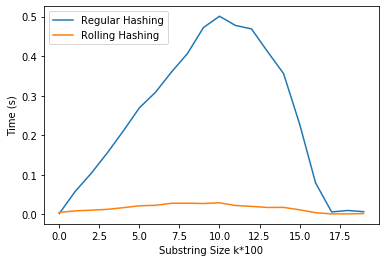

In [41]:
# plotting
plt.plot(range(int(len(y)/factor)),regular_k, label = "Regular Hashing")
plt.plot(range(int(len(y)/factor)),rh_k, label = "Rolling Hashing" )
plt.xlabel("Substring Size k*100")
plt.ylabel("Time (s)")
plt.legend()

We see that as k increases, the runtime of regular hashing initially increases but later decreases. I suspect this is because as the substring size increases, the number of inserts into the hash table needed decreases, resulting in better time complexity, while runtime for the hash function itself barely increases as the length of the substring increases. On the other hand, the runtime for rolling hashing stays low even as k varies. Therefore, generally-speaking, the runtimes for both algorithms in terms of k are $O(1)$, indicating that they are independent of k.

The following graph shows the time complexity difference of the two approaches while n (length of each string) increases.

In [48]:
# initialze variables
x = text_Kennedy
y = text_King
k = 10
iteration = 10
factor = 50

# initialize storage
regular = []
rh = []

# main for loop for runtime tracking
for k in range(int(len(y)/factor)):
    temp_regular = 0
    temp_rh = 0
    
    # interations for each n (number of char in the string)
    for i in range(iteration):
        if k:
            # regular hashing runtime
            start = time.time()
            regular_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_regular += end-start
            
            # rolling hashing runtime
            start = time.time()
            rh_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_rh += end-start
        
    regular.append(temp_regular/iteration)
    rh.append(temp_rh/iteration)

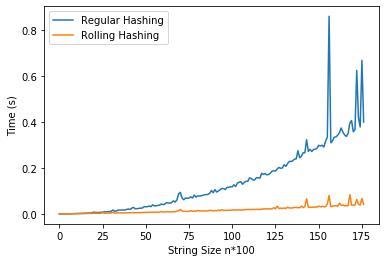

In [49]:
# plotting
plt.plot(range(int(len(y)/factor)),regular, label = "Regular Hashing")
plt.plot(range(int(len(y)/factor)),rh, label = "Rolling Hashing")
plt.xlabel("String Size n*100")
plt.ylabel("Time (s)")
plt.legend()

In this plot, we see that as n increases, the order of growth of the runtime of regular hashing is asymptotically larger than that of rolling hashing. This means that the time complexity of regular hashing is larger than rolling hashing, with rolling hashing having a time complexity close to $O(1)$ and regular hashing closer to $O(n)$. This suggests, in terms of time complexity, rolling hashing is better than regular hashing.

One important note is that these two plots above are using real-life data; therefore, I can say that rolling hashing is better than regular hashing realistically.

In the following two plots, I changed inputs of strings with the first plot showing the edge case of completely different strings and the second plot showing a completely exact string.

In [183]:
# initialze variables
a = "a"*10000
b = "b"*10000
k = 100
iteration = 50
factor = 100

# initialize storage
regular_a = []
rh_a = []

# main for loop for runtime tracking
for k in range(int(len(a)/factor)):
    temp_regular = 0
    temp_rh = 0
    
    # interations for each n (number of char in the string)
    for i in range(iteration):
        if k:
            # regular hashing runtime
            start = time.time()
            regular_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_regular += end-start
            
            # rolling hashing runtime
            start = time.time()
            rh_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_rh += end-start
        
    regular_a.append(temp_regular/iteration)
    rh_a.append(temp_rh/iteration)

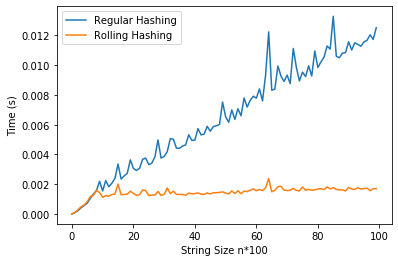

In [184]:
# plotting
plt.plot(range(int(len(a)/factor)),regular_a, label = "Regular Hashing")
plt.plot(range(int(len(a)/factor)),rh_a, label = "Rolling Hashing")
plt.xlabel("String Size n*100")
plt.ylabel("Time (s)")
plt.legend()

In [187]:
# initialze variables
a = "b"*10000
b = "b"*10000
k = 100
iteration = 50
factor = 100

# initialize storage
regular_b = []
rh_b = []

# main for loop for runtime tracking
for k in range(int(len(b)/factor)):
    temp_regular = 0
    temp_rh = 0
    
    # interations for each n (number of char in the string)
    for i in range(iteration):
        if k:
            # regular hashing runtime
            start = time.time()
            regular_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_regular += end-start
            
            # rolling hashing runtime
            start = time.time()
            rh_get_match(x[:k*factor], y[:k*factor], k)
            end = time.time()
            temp_rh += end-start
        
    regular_b.append(temp_regular/iteration)
    rh_b.append(temp_rh/iteration)

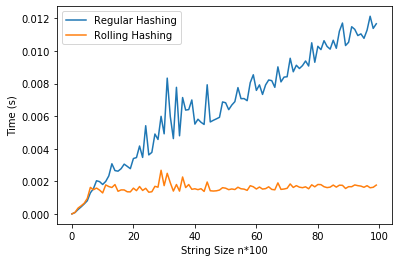

In [188]:
# plotting
plt.plot(range(int(len(b)/factor)),regular_b, label = "Regular Hashing")
plt.plot(range(int(len(b)/factor)),rh_b, label = "Rolling Hashing")
plt.xlabel("String Size n*100")
plt.ylabel("Time (s)")
plt.legend()

The two plots above show similar asymptotic behaviors with the previous plots with regular hashing increasing in the order of growth of $O(n)$ while the rolling hashing increasing in the order of growth of $O(1)$. This suggests that rolling hashing is time complexity-wise more advantages to regular hashing.

# PART 5: HCs and LOs

List all the LOs and HCs you have exercised while working on this final assignment as well as a thorough justification of their application. Review your previous assignments and in-class grades, and reflect on your application of these LOS has evolved over time

- #LOs
    - #DataStructures
        - In this assignment, I used hash tables as the data structure of choice to store the data of each substring. In Part 1, I discussed the advantages of hash tables in terms of time complexity, which essentially cuts the time complexity in half due to the O(1) lookup time.
        - Looking back at the beginning of the semester, I definitely improved my understanding of different data structures, namely lists, heaps, priority queues, trees, and now hash tables. I also understand where and when to use each structure with the goal of minimizing the time complexity.
    - #ComputaionalSolution
        - In this assignment, I formulated a computational solution for detecting plagiarism. I dissect the problem into pre-processing of the strings, input into the algorithm, and output by showing the percentage of similarity between the two strings. This value can then use to evaluate plagiarism of the two strings.
        - At the beginning of the semester, finding a computational solution was very hard, especially during the scheduler assignment. However, after learning more problems during the dynamic programming algorithm classes to resizing and tries, I now have a clearer understanding of how to approach a problem and what are some steps needed (research, formulate a flow chart) to effectively solve a problem.
    - #ComputationalCritique
        - In this assignment, I compared and critiqued the accuracy of two different solutions to plagiarism detection, namely the longest common substring approach and the edit distance approach. I went into details on where the longest common substring or edit distance would be better and generally which algorithm is better. In addition, I talked about the limitation of both solutions, which requires another algorithm to satisfy the needs.
        - From the start of the semester, I couldn't really compare which solution is better at performing a task. However, as we learn more about test cases, time complexity, and data structures, I gradually come to the understanding that according to the different needs of a problem, different algorithms are better at each case - notwithstanding some algorithms that are just bad.
    - #DynamicProgramming:
        - In this assignment, I used dynamic programming to calculate the edit distance in part 3. This method reduces the time complexity of the algorithm from $O(3^n)$ to $O(n^2)$, which makes it computationally feasible for running when the n increases. I also specify that I used a bottom-up approach as well as the optimal substructure of the subproblem in order to achieve global optimization.
        - I didn't have a chance to explore more dynamic programming, but I think the class on comparing greedy algorithms and dynamic programming let me realized the pros and cons of dynamic programming and also when to use dynamic programming (optimal substructure, repeating use of subproblem, etc.).
    - #ComplexityAnalysis:
        - In this assignment, I used time complexity analysis multiple times to specify which algorithm is better than another and how different approaches decrease the time complexity of the algorithm. In addition, I plotted figures on the runtimes of the two get_match algorithms to see whether the time complexity of regular hashing or rolling hashing is better.
        - I think the most confusing topic at the beginning of the semester was definitely time complexities. However, as we learned more algorithms and applied them countless times, I can now get the idea of time complexity just by looking at the runtime figures and separate between feasible and unfeasible algorithms (exponentially vs. polynomially).
    - #PythonProgramming:
        - In this assignment, I created functions, used libraries, and produced the code in a simple, clean matter. I also completed and implemented three different algorithms, created plots and tables for complexity analysis and computational critiques.
        - I think learning how to use classes and why Python is considered an object-oriented language really improved my python skills throughout the semester. By also learning how to implement different data structures, recursions, and dynamic programming/greed algorithms, I feel more confident in my Python skills.
- #HCs
    - #algorithms: In this assignment, I created three different algorithms that detect plagiarism. I use algorithmic thinking to formulate each algorithm and execute the code step-by-step. In the end, I talked about the advantages and disadvantages of each algorithm and its ability to solve real-life problems.
    - #optimization: In this assignment, I tried to optimize in terms of time complexity and accuracy of plagiarism detection. To optimize the time complexity, I compared two different hash functions and plotted runtime figures to tease out which algorithm is better asymptotically. To optimize accuracy, I created psuedotexts to check which algorithm would be more useful in each case and in real-life scenarios.
    - #constraints: In this assignment, I identified the constraint of creating plagiarism detection in real-life. Specifically, I showed that the edit distance approach is more accurate when encountering real-life data. However, its constraints are cases where the sentence or reordered. For the longest common substring, I showed its constraints on accurately projecting similarities across different examples. I also presented a case where both algorithms would not perform well in detecting plagiarism.